# Imports COCO dataset

In [7]:
import matplotlib.pyplot as plt
from pycocotools.coco import COCO
import skimage.io as io

# Imports MediaPipe

In [8]:
import scipy.io
import os
import mediapipe as mp
import cv2
from mediapipe import solutions
from mediapipe.framework.formats import landmark_pb2
from mediapipe.tasks import python
from mediapipe.tasks.python import vision
import shutil

# Imports for boths

In [9]:
import numpy as np

# Imports YOLO

In [23]:
from ultralytics import YOLO

# Load test images for model MediaPipe

In [10]:
N = 10
MEDIAPIPE_IMAGES_DIR = "./MEDIAPIPE_images"
output_folder= "./raw_images"

if not os.path.exists(output_folder):
    os.makedirs(output_folder)

# Load annotations from COCO dataset

In [11]:
dataDir = './coco/'
dataType = 'val2017'
annFile_kps = '{}/annotations/person_keypoints_{}.json'.format(dataDir, dataType)
coco_kps = COCO(annFile_kps)

loading annotations into memory...
Done (t=0.32s)
creating index...
index created!


# Get'person' category ID and get image ID with 'person' category and list to store true keypoints coordenates

In [15]:
catIds = coco_kps.getCatIds(catNms=['person'])
imgIds = coco_kps.getImgIds(catIds=catIds)[:10]
true_keypoints_list = []

# Load and show the first 10 images with Keypoints and get keypoints coordenates

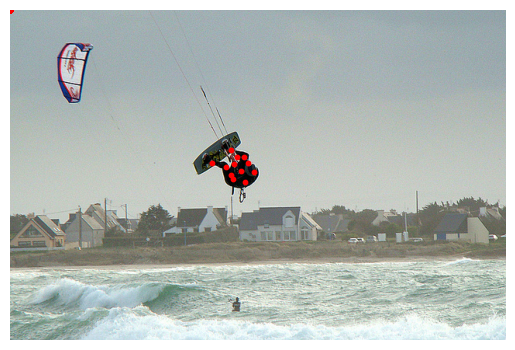

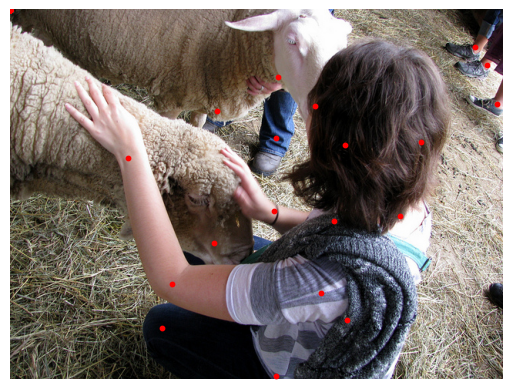

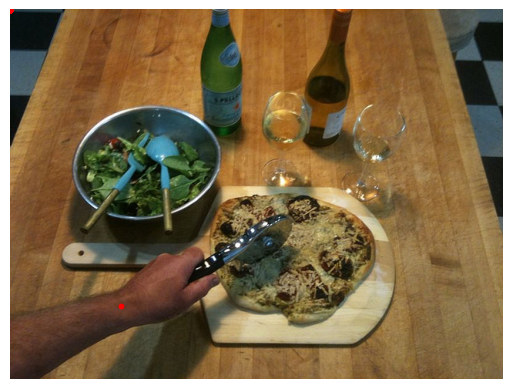

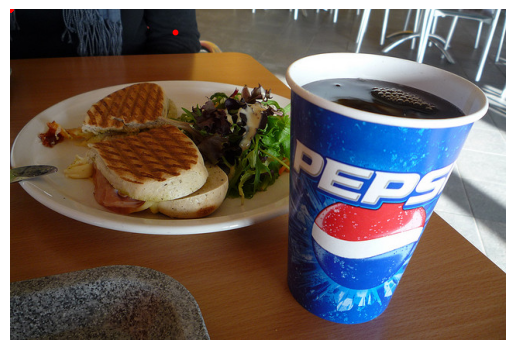

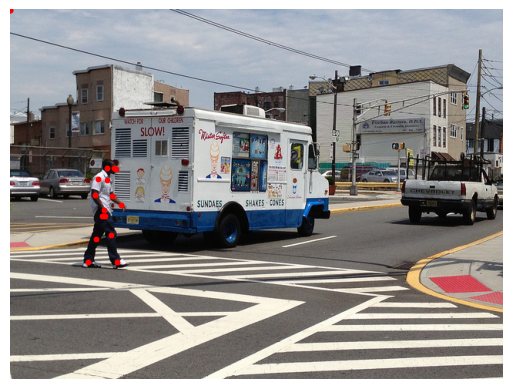

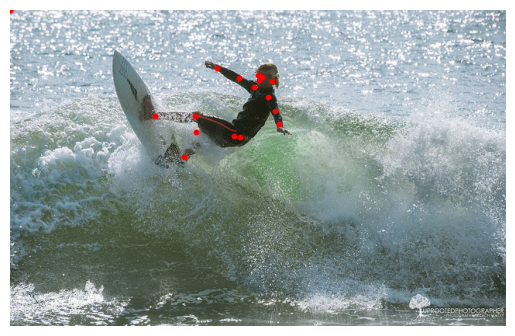

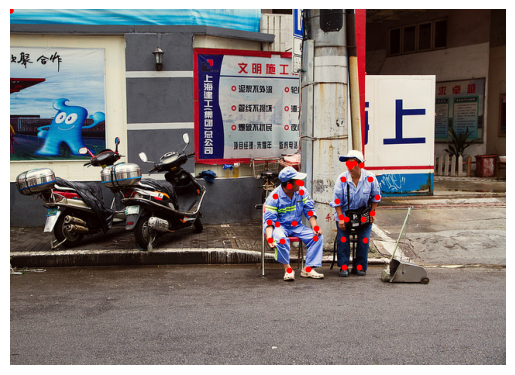

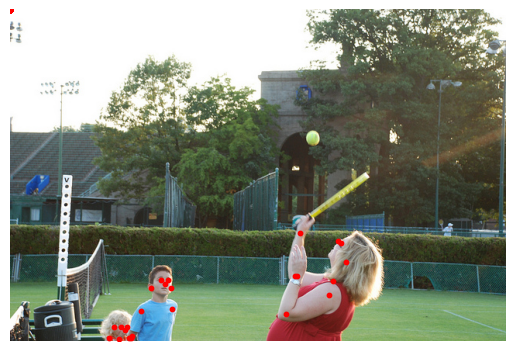

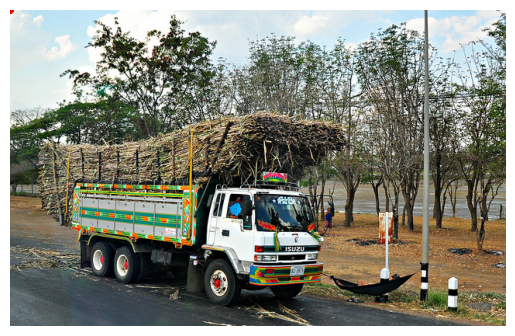

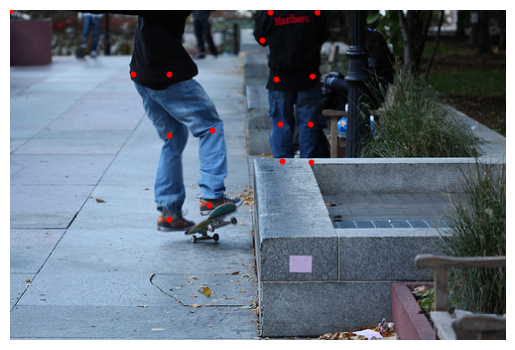

In [19]:
for imgId in imgIds:
    
    img_info = coco_kps.loadImgs(imgId)[0]
    img_url = img_info['coco_url']
    
    
    I = io.imread(img_url)
    filename = img_url.split('/')[-1]
    output_path = os.path.join(output_folder, filename)
    
    
    io.imsave(output_path, I)
    
    
    #plt.imshow(I)
    #plt.axis('off')
    #plt.show()
    
    
    annIds = coco_kps.getAnnIds(imgIds=imgId, catIds=catIds, iscrowd=None)
    anns = coco_kps.loadAnns(annIds)
    keypoints_per_image = []
    for ann in anns:
        keypoints = ann['keypoints']
        if keypoints:
            keypoints = np.array(keypoints).reshape(-1, 3)  
            x = keypoints[:, 0]
            y = keypoints[:, 1]
            keypoints_per_image.append(keypoints.tolist())
            plt.scatter(x, y, s=10, c='r')
    
    plt.imshow(I)
    plt.axis('off')
    plt.show()

    true_keypoints_list.append(keypoints_per_image)

#print("True keypoints coordenates for the first image:")
#print(true_keypoints_list[0])

# Show keypoints for actual image

In [59]:
#if anns:
    #ann = np.random.choice(anns)
    #keypoints = ann['keypoints']
    #if keypoints:
        #keypoints = np.array(keypoints).reshape(-1, 3)  
        #x = keypoints[:, 0]
        #y = keypoints[:, 1]
        #plt.scatter(x, y, s=10, c='r')

#plt.imshow(I)
#plt.axis('off')
#plt.show()

# Model MediaPipe

In [22]:
if not os.path.exists(MEDIAPIPE_IMAGES_DIR):
    os.makedirs(MEDIAPIPE_IMAGES_DIR)

def detect_pose(image_path):
    mp_pose = mp.solutions.pose
    pose = mp_pose.Pose(static_image_mode=True, min_detection_confidence=0.5)
    
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    results = pose.process(image_rgb)

    # get predicted coordenates:
    predicted_keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            predicted_keypoints.append((landmark.x, landmark.y))
    # draw landmarks in image pose
    #if results.pose_landmarks:
        #mp_drawing = mp.solutions.drawing_utils
        #annotated_image = image.copy()
        #mp_drawing.draw_landmarks(annotated_image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

        #if not os.path.exists(MEDIAPIPE_IMAGES_DIR):
            #os.makedirs(MEDIAPIPE_IMAGES_DIR)
        
        # save image with landmarks inside dir'output'
        #file_path = os.path.join(MEDIAPIPE_IMAGES_DIR, f'{os.path.basename(image_path)}')
        #cv2.imwrite(file_path, annotated_image)
        #print("landmarks detected")
    #else:
        #pass
        #print("no landmarks detected")
    pose.close()
    return predicted_keypoints

predicted_keypoints_list_mp = []

files = filter(lambda file:file.endswith('.jpg'), os.listdir(output_folder))
for file in files:
    image_file = os.path.join(output_folder, file)
    predicted_keypoints = detect_pose(image_file)
    predicted_keypoints_list_mp.append(predicted_keypoints)
#print(predicted_keypoints_list_mp)
    #detect_pose(image_file)

# Goal structure

In [24]:
#def getLandmarks(x):
    #yHat = {}
    #yHat["MediaPipe"] = getLandmarksMediaPipe(x)
    #yHat["Yolo"] = getLandmarksYolo(x)
    #return yHat

#def evaluateModels(y,yHat):
    #metrics = {}
    #metrics["MediaPipe"] = evaluateMediaPipe(y,yHat)
    #metrics["Yolo"] = evaluateYolo(y,yHat)
    #metrics
#def compareModels(metrics):
    #pass

In [25]:
#x,y = readDataset()
#yHat = getLandmarks(x)
#metrics = evaluateModels(y,yHat)
#compareModels(metrics)

# Model YOLO v8

In [24]:
model = YOLO("yolov8m-pose.pt") 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50.8M/50.8M [00:01<00:00, 38.1MB/s]


In [26]:
YOLO_IMAGES_DIR = "./YOLO_images"

if not os.path.exists(YOLO_IMAGES_DIR):
    os.makedirs(YOLO_IMAGES_DIR)